# Initial Data Analytics for Project BASS

## Step 1: Data Mining and Cleaning

In [1]:
import pandas as pd

importing the dataset

In [83]:
df = pd.read_csv('scan_results.csv',',', error_bad_lines=False)

C:\Anaconda3\lib\site-packages\IPython\core\interactiveshell.py:2698: DtypeWarning: Columns (5,8,9,11,13,43) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


showing first 5 rows of the dataset

In [3]:
df.head()

,TESTNUMBER,BANDWIDTH,OPERATOR,SIGNAL,SIGNALBARS,CONNECTIVITY_available,CONNECTIVITY_detailedState,CONNECTIVITY_extraInfo,CONNECTIVITY_failOver,CONNECTIVITY_roaming,...,LOCATION_mLongitude,LOCATION_mProvider,LOCATION_mSpeed,NETWORK_cid,NETWORK_lac,NETWORK_mcc,NETWORK_mnc,VERSION,LOCATION_epochTime,Unnamed: 43
0,1.0,1762.0 Kbps,GLOBE,LTE : -97,null,TRUE,CONNECTED,NETGEAR44,FALSE,FALSE,...,123.963,fused,0,null,null,null,null,null,11/08/2017 17:00,NaN
1,2.0,1762.0 Kbps,GLOBE,LTE : -97,null,TRUE,CONNECTED,NETGEAR44,FALSE,FALSE,...,123.963,fused,0,null,null,null,null,null,11/08/2017 17:00,NaN
2,3.0,188.0 Kbps,GLOBE,WCDMA : -79,null,TRUE,CONNECTED,internet.globe.com.ph,FALSE,FALSE,...,120.439,fused,0,null,null,null,null,null,11/08/2017 17:00,NaN
3,4.0,163.0 Kbps,GLOBE,WCDMA : -103,null,TRUE,CONNECTED,internet.globe.com.ph,FALSE,FALSE,...,120.439,fused,0,null,null,null,null,null,11/08/2017 17:00,NaN
4,5.0,163.0 Kbps,GLOBE,WCDMA : -103,null,TRUE,CONNECTED,internet.globe.com.ph,FALSE,FALSE,...,120.439,fused,0,null,null,null,null,null,11/08/2017 17:00,NaN


Looking at the data if there are missing values

In [4]:
df.isnull().sum()

TESTNUMBER                             5
BANDWIDTH                             54
OPERATOR                           12094
SIGNAL                             37470
SIGNALBARS                             5
CONNECTIVITY_available                 5
CONNECTIVITY_detailedState             5
CONNECTIVITY_extraInfo              3754
CONNECTIVITY_failOver                  5
CONNECTIVITY_roaming                   5
CONNECTIVITY_state                     9
CONNECTIVITY_subType                   5
CONNECTIVITY_subTypeName          146439
CONNECTIVITY_type                      5
CONNECTIVITY_typeName                  5
DEVICE_manufacturer                    5
DEVICE_model                           5
DEVICE_name                            5
DEVICE_release                         5
LOCATION_mAccuracy                     5
LOCATION_mAltitude                     5
LOCATION_mDistance                     5
LOCATION_mElapsedRealtimeNanos         5
LOCATION_mHasAccuracy                  5
LOCATION_mHasAlt

from the initial data mining, there are at least 5 rows of missing values. It would be better if those rows are deleted from the dataframe to avoid confusion of the data

filtering the data to show only the Nan and Null values from the dataframe:

In [7]:
df[df['TESTNUMBER'].isnull()]

,TESTNUMBER,BANDWIDTH,OPERATOR,SIGNAL,SIGNALBARS,CONNECTIVITY_available,CONNECTIVITY_detailedState,CONNECTIVITY_extraInfo,CONNECTIVITY_failOver,CONNECTIVITY_roaming,...,LOCATION_mLongitude,LOCATION_mProvider,LOCATION_mSpeed,NETWORK_cid,NETWORK_lac,NETWORK_mcc,NETWORK_mnc,VERSION,LOCATION_epochTime,Unnamed: 43
44844,NaN,NaN,null,TRUE,CONNECTED,internet.globe.com.ph,FALSE,FALSE,CONNECTED,15,...,0,null,null,null,null,4.1.0.0,11/08/2017 18:00,NaN,NaN,NaN
222869,NaN,NaN,null,TRUE,CONNECTED,BOOK WIFI,FALSE,FALSE,CONNECTED,0,...,0,null,null,null,null,4.1.0.0,09/09/2017 23:00,NaN,NaN,NaN
222874,NaN,NaN,null,TRUE,CONNECTED,BOOK WIFI,FALSE,FALSE,CONNECTED,0,...,0,null,null,null,null,4.1.0.0,09/09/2017 23:00,NaN,NaN,NaN
222876,NaN,NaN,null,TRUE,CONNECTED,BOOK WIFI,FALSE,FALSE,CONNECTED,0,...,0,null,null,null,null,4.1.0.0,09/09/2017 23:00,NaN,NaN,NaN
222878,NaN,NaN,null,TRUE,CONNECTED,BOOK WIFI,FALSE,FALSE,CONNECTED,0,...,0,null,null,null,null,4.1.0.0,09/09/2017 23:00,NaN,NaN,NaN


In [19]:
# Showing the original shape of the dataset
df.shape

(222973, 44)

In [84]:
# Showing the dataframe shape after dropping the 5 null rows and modifying the dataframe
df = df.dropna(subset = ['TESTNUMBER', 'LOCATION_epochTime'], how = 'any')

The code above shows both dropping NA and NaT in TESTNUMBER and LOCATION_epochTime respectively.

In [39]:
df.head()

,TESTNUMBER,BANDWIDTH,OPERATOR,SIGNAL,SIGNALBARS,CONNECTIVITY_available,CONNECTIVITY_detailedState,CONNECTIVITY_extraInfo,CONNECTIVITY_failOver,CONNECTIVITY_roaming,...,LOCATION_mLon2,LOCATION_mLongitude,LOCATION_mProvider,LOCATION_mSpeed,NETWORK_cid,NETWORK_lac,NETWORK_mcc,NETWORK_mnc,VERSION,LOCATION_epochTime
0,1.0,1762.0 Kbps,GLOBE,LTE : -97,null,TRUE,CONNECTED,NETGEAR44,FALSE,FALSE,...,null,123.963,fused,0,null,null,null,null,null,2017-11-08 17:00:00
1,2.0,1762.0 Kbps,GLOBE,LTE : -97,null,TRUE,CONNECTED,NETGEAR44,FALSE,FALSE,...,null,123.963,fused,0,null,null,null,null,null,2017-11-08 17:00:00
2,3.0,188.0 Kbps,GLOBE,WCDMA : -79,null,TRUE,CONNECTED,internet.globe.com.ph,FALSE,FALSE,...,0,120.439,fused,0,null,null,null,null,null,2017-11-08 17:00:00
3,4.0,163.0 Kbps,GLOBE,WCDMA : -103,null,TRUE,CONNECTED,internet.globe.com.ph,FALSE,FALSE,...,0,120.439,fused,0,null,null,null,null,null,2017-11-08 17:00:00
4,5.0,163.0 Kbps,GLOBE,WCDMA : -103,null,TRUE,CONNECTED,internet.globe.com.ph,FALSE,FALSE,...,0,120.439,fused,0,null,null,null,null,null,2017-11-08 17:00:00


Dropping the last column since it doesnt have any meaning to the data

In [85]:
df = df.drop('Unnamed: 43', axis=1)

In [26]:
df.head()

,TESTNUMBER,BANDWIDTH,OPERATOR,SIGNAL,SIGNALBARS,CONNECTIVITY_available,CONNECTIVITY_detailedState,CONNECTIVITY_extraInfo,CONNECTIVITY_failOver,CONNECTIVITY_roaming,...,LOCATION_mLon2,LOCATION_mLongitude,LOCATION_mProvider,LOCATION_mSpeed,NETWORK_cid,NETWORK_lac,NETWORK_mcc,NETWORK_mnc,VERSION,LOCATION_epochTime
0,1.0,1762.0 Kbps,GLOBE,LTE : -97,null,TRUE,CONNECTED,NETGEAR44,FALSE,FALSE,...,null,123.963,fused,0,null,null,null,null,null,11/08/2017 17:00
1,2.0,1762.0 Kbps,GLOBE,LTE : -97,null,TRUE,CONNECTED,NETGEAR44,FALSE,FALSE,...,null,123.963,fused,0,null,null,null,null,null,11/08/2017 17:00
2,3.0,188.0 Kbps,GLOBE,WCDMA : -79,null,TRUE,CONNECTED,internet.globe.com.ph,FALSE,FALSE,...,0,120.439,fused,0,null,null,null,null,null,11/08/2017 17:00
3,4.0,163.0 Kbps,GLOBE,WCDMA : -103,null,TRUE,CONNECTED,internet.globe.com.ph,FALSE,FALSE,...,0,120.439,fused,0,null,null,null,null,null,11/08/2017 17:00
4,5.0,163.0 Kbps,GLOBE,WCDMA : -103,null,TRUE,CONNECTED,internet.globe.com.ph,FALSE,FALSE,...,0,120.439,fused,0,null,null,null,null,null,11/08/2017 17:00


Converting the epochTime into a date-time object for easier date-time manipulation

In [28]:
# checking what type of object is the epochTime
df['LOCATION_epochTime'].dtype

dtype('O')

In [86]:
# Converting epochTime to datetime object
df['LOCATION_epochTime'] = pd.to_datetime(df['LOCATION_epochTime'])

In [30]:
df['LOCATION_epochTime'].dtype

dtype('<M8[ns]')

Checking to see whether the data has dates less than the year 2017

In [34]:
df[df['LOCATION_epochTime'] < pd.datetime(2017,1,1)]

,TESTNUMBER,BANDWIDTH,OPERATOR,SIGNAL,SIGNALBARS,CONNECTIVITY_available,CONNECTIVITY_detailedState,CONNECTIVITY_extraInfo,CONNECTIVITY_failOver,CONNECTIVITY_roaming,...,LOCATION_mLon2,LOCATION_mLongitude,LOCATION_mProvider,LOCATION_mSpeed,NETWORK_cid,NETWORK_lac,NETWORK_mcc,NETWORK_mnc,VERSION,LOCATION_epochTime
6262,6264.0,3973 Kbps,Globe,LTE : -113,0,TRUE,CONNECTED,GAPLabs,Inc - Alegro Rm.,FALSE,...,null,null,125.001,fused,0,null,null,null,null,2000-01-01


Dropping the date since it yield erronous data

In [87]:
df = df.drop(6262)

In [61]:
df[df['LOCATION_epochTime'] < pd.datetime(2017,1,1)]

,TESTNUMBER,BANDWIDTH,OPERATOR,SIGNAL,SIGNALBARS,CONNECTIVITY_available,CONNECTIVITY_detailedState,CONNECTIVITY_extraInfo,CONNECTIVITY_failOver,CONNECTIVITY_roaming,...,LOCATION_mLon2,LOCATION_mLongitude,LOCATION_mProvider,LOCATION_mSpeed,NETWORK_cid,NETWORK_lac,NETWORK_mcc,NETWORK_mnc,VERSION,LOCATION_epochTime


In [46]:
df.shape

(222962, 43)

## Step 2: Plotting

In [48]:
import matplotlib.pyplot as plt
%matplotlib inline

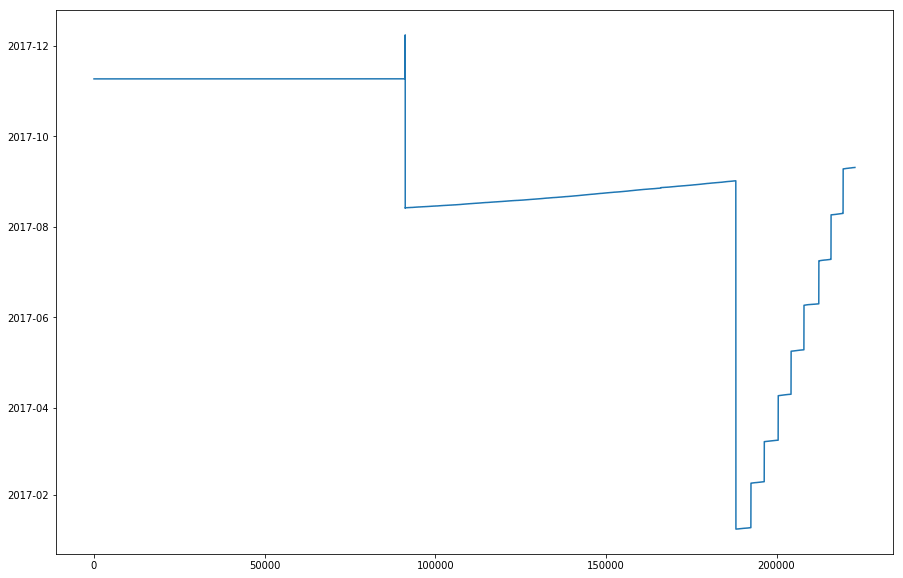

In [111]:
plt.figure(figsize=[15,10])
plt.plot(df['TESTNUMBER'],df['LOCATION_epochTime'])

The graph shows that the Time series is more believable

In [50]:
df['OPERATOR'].unique()

array(['GLOBE', 'SMART GOLD 3G', nan, 'SMART', 'SUN', 'Smart', 'Globe',
       'INFINITY 3G', 'Sun', 'T-Mobile', 'Globe Telecom-PH', 'Android',
       'SMART Prepaid', 'Globe Telecom', 'null', 'StarHub', 'Talk N Text',
       'TM', 'SMART Buddy', 'TNT', 'Singtel', 'Chunghwa Telecom',
       'Verizon', 'AT&T', 'ATT', 'Carrier', 'INFINITY', 'Sun Cellular',
       '??????', 'Smart Communications Inc', 'SMART Buddy-GLOBE',
       'Family Mobile', 'STC', 'SAMSUNG', 'ABS-CBN', 'SUN CELLULAR',
       'LG U+', 'Sprint', 'Vodafone', 'etisalat', 'iPad', 'PLDT LL+',
       'MetroPCS', 'M1 Singapore', 'Mobily', 'Boost', 'SMART Bro',
       'cricket', 'Carolina West', 'Ooredoo', '525999', 'Far EasTone',
       'TFW', 'Claro Costa Rica', 'O2 - UK', 'U.S. Cellular', 'Cellcom',
       'CC', 'SGP-M1', 'Wataniya', '3 Macau', 'Starhub',
       'GLOBE-SMART Prepaid', 'Grameenphone', '1&1', 'SMART Prepaid-', '-',
       '51502', 'Cherry Prepaid', 'PH Sun Cellular', '51503', 'Globe-',
       'du', 'SUN-GLOB

<b> QUESTION: Do we only consider Globe, Smart, Sun and other local network? Did you drop the other operators? </b>

In [51]:
df['BANDWIDTH'].unique()

array(['1762.0 Kbps', '188.0 Kbps', '163.0 Kbps', ..., '18532 Kbps',
       '15361 Kbps', '14068 Kbps'], dtype=object)

Removing Kbps string

In [88]:
df['BANDWIDTH'] = df['BANDWIDTH'].str.replace('Kbps','')
df.head()

,TESTNUMBER,BANDWIDTH,OPERATOR,SIGNAL,SIGNALBARS,CONNECTIVITY_available,CONNECTIVITY_detailedState,CONNECTIVITY_extraInfo,CONNECTIVITY_failOver,CONNECTIVITY_roaming,...,LOCATION_mLon2,LOCATION_mLongitude,LOCATION_mProvider,LOCATION_mSpeed,NETWORK_cid,NETWORK_lac,NETWORK_mcc,NETWORK_mnc,VERSION,LOCATION_epochTime
0,1.0,1762.0,GLOBE,LTE : -97,null,TRUE,CONNECTED,NETGEAR44,FALSE,FALSE,...,null,123.963,fused,0,null,null,null,null,null,2017-11-08 17:00:00
1,2.0,1762.0,GLOBE,LTE : -97,null,TRUE,CONNECTED,NETGEAR44,FALSE,FALSE,...,null,123.963,fused,0,null,null,null,null,null,2017-11-08 17:00:00
2,3.0,188.0,GLOBE,WCDMA : -79,null,TRUE,CONNECTED,internet.globe.com.ph,FALSE,FALSE,...,0,120.439,fused,0,null,null,null,null,null,2017-11-08 17:00:00
3,4.0,163.0,GLOBE,WCDMA : -103,null,TRUE,CONNECTED,internet.globe.com.ph,FALSE,FALSE,...,0,120.439,fused,0,null,null,null,null,null,2017-11-08 17:00:00
4,5.0,163.0,GLOBE,WCDMA : -103,null,TRUE,CONNECTED,internet.globe.com.ph,FALSE,FALSE,...,0,120.439,fused,0,null,null,null,null,null,2017-11-08 17:00:00


Removing the null string values in the dataframe

In [89]:
df = df[df['BANDWIDTH'] != 'null']

In [91]:
df[df['BANDWIDTH'] == 'null']

,TESTNUMBER,BANDWIDTH,OPERATOR,SIGNAL,SIGNALBARS,CONNECTIVITY_available,CONNECTIVITY_detailedState,CONNECTIVITY_extraInfo,CONNECTIVITY_failOver,CONNECTIVITY_roaming,...,LOCATION_mLon2,LOCATION_mLongitude,LOCATION_mProvider,LOCATION_mSpeed,NETWORK_cid,NETWORK_lac,NETWORK_mcc,NETWORK_mnc,VERSION,LOCATION_epochTime


Converting the BANDWIDTH column from object type to float type

In [97]:
df['BANDWIDTH'] = df['BANDWIDTH'].astype(float)

C:\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


Dropping the NAN and NULL values in the BANDWIDTH column

In [92]:
df = df.dropna(subset=['BANDWIDTH'])

Initial plot for the Bandwidth data

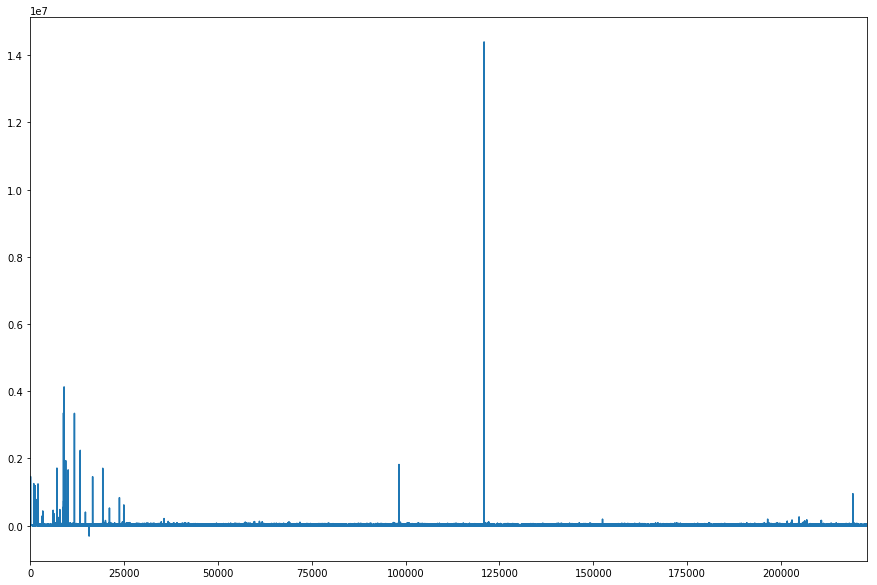

In [113]:
df['BANDWIDTH'].plot(figsize = [15,10])

In [105]:
df[df['BANDWIDTH'] > 1500]

,TESTNUMBER,BANDWIDTH,OPERATOR,SIGNAL,SIGNALBARS,CONNECTIVITY_available,CONNECTIVITY_detailedState,CONNECTIVITY_extraInfo,CONNECTIVITY_failOver,CONNECTIVITY_roaming,...,LOCATION_mLon2,LOCATION_mLongitude,LOCATION_mProvider,LOCATION_mSpeed,NETWORK_cid,NETWORK_lac,NETWORK_mcc,NETWORK_mnc,VERSION,LOCATION_epochTime
0,1.0,1762.0,GLOBE,LTE : -97,null,TRUE,CONNECTED,NETGEAR44,FALSE,FALSE,...,null,123.963,fused,0,null,null,null,null,null,2017-11-08 17:00:00
1,2.0,1762.0,GLOBE,LTE : -97,null,TRUE,CONNECTED,NETGEAR44,FALSE,FALSE,...,null,123.963,fused,0,null,null,null,null,null,2017-11-08 17:00:00
7,8.0,6787.0,GLOBE,LTE : -73,null,TRUE,CONNECTED,internet.globe.com.ph,FALSE,FALSE,...,0,121.017,fused,0,null,null,null,null,null,2017-11-08 18:00:00
10,11.0,8547.0,GLOBE,LTE : -71,null,TRUE,CONNECTED,internet.globe.com.ph,FALSE,FALSE,...,0,121.017,fused,0,null,null,null,null,null,2017-11-08 18:00:00
11,12.0,6591.0,GLOBE,LTE : -72,null,TRUE,CONNECTED,internet.globe.com.ph,FALSE,FALSE,...,0,121.017,fused,0,null,null,null,null,null,2017-11-08 18:00:00
13,14.0,22910.0,NaN,WCDMA : -51,null,TRUE,CONNECTED,GoogleGuest,FALSE,FALSE,...,null,-122.035,fused,0,null,null,null,null,null,2017-11-08 18:00:00
14,15.0,4078.0,GLOBE,LTE : -98,null,TRUE,CONNECTED,OPC,FALSE,FALSE,...,0,120.985,fused,0,null,null,null,null,null,2017-11-08 18:00:00
15,16.0,3614.0,GLOBE,LTE : -99,null,TRUE,CONNECTED,OPC,FALSE,FALSE,...,0,120.985,fused,0,null,null,null,null,null,2017-11-08 18:00:00
16,17.0,3229.0,GLOBE,LTE : -99,null,TRUE,CONNECTED,OPC,FALSE,FALSE,...,0,120.985,fused,0,null,null,null,null,null,2017-11-08 18:00:00
17,18.0,5883.0,GLOBE,LTE : -90,null,TRUE,CONNECTED,internet.globe.com.ph,FALSE,FALSE,...,0,120.985,fused,0,null,null,null,null,null,2017-11-08 18:00:00


<b> QUESTION: What is the typical range of values for the bandwidth? Having a bandwidth more than 10,000 normal? </b>